In [1]:
"""
Created By    : Jared W. Marquis
Creation Date : 01 August 2022
Course        : ATSC 528 - Atmospheric Data Analysis
Assignment    : #01 - Function Fitting

Purpose:
Script to take sparse upper air observations and analyze them on a
polar stereographic map projection using function fitting.
[PUT MORE INFORMATION HERE - I.E., WHAT SPECIFIC THING IS BEING DONE]

"""
__author__    = "Jared W. Marquis"
__contact__   = "jared.marquis@und.edu"

In [11]:
### Import Required Modules (shouldn't need to change) ###
import numpy as np                 #numpy for math
import matplotlib.pyplot as plt    #matplotlib for plotting
#import cartopy.crs as ccrs         #cartopy for plotting on map
#import cartopy.feature as cfeature #cartopy basic shapefiles

# Going to use basemap for projections instead of Cartopy
# - There is something wrong with the ssl certificates on my computer, and
# it will take a bit to fix.
from mpl_toolkits.basemap import Basemap

In [58]:
#
class Analysis:
    PLANET_RADIUS = 6371000 # Radius in meters
    
    obs = []
    
    def __init__(self, a_name):
        self.name = a_name
    
    def add_ds(self, f_path):
        f_stream = open(f_path, encoding = "utf-8")
        
        for ob in f_stream:
            ob = ob.strip("\n")
            ob = ob.split(',')
            
            self.obs.append(ob)
        
        f_stream.close()

    def print_ds(self):
        print(self.name)
        print(self.obs[:])

    def set_name(self, a_name):
        self.name = a_name

    def get_name(self):
        return self.name
    
    def set_mapscale(self, mapscale):
        self.mapscale = mapscale

    def get_mapscale(self):
        return self.mapscale
    
    def set_planelat(self, ts_lat):
        self.ts_lat = ts_lat

    def get_planelat(self):
        return self.ts_lat
    
    def cal_imscale(self, lat):
        return (1 + np.sin(self.ts_lat)) / (1 + np.sin(np.deg2rad(lat)))

    def cal_mapsize(self, map_edge):
        lat_radius = self.PLANET_RADIUS * np.cos(map_edge)
        imscale = self.cal_imscale(map_edge)
        imrad = imscale * lat_radius

        self.map_size = self.mapscale * imrad
        return self.map_size
    
    def convert_pos(self, cen_lon):
        print(self.obs[:, 1])
        
        obs_1 = self.cal_imscale(self.obs[:][1]) * self.PLANET_RADIUS * np.cos(np.deg2rad(self.obs[:][1]))
        obs_x = np.cos(np.deg2rad(self.obs[:][2] - cen_lon))
        obs_y = np.sin(np.deg2rad(self.obs[:][2] - cen_lon))

        self.obs_x = obs_1 * obs_x
        self.obs_y = obs_1 * obs_y
    

In [59]:
### Read in observations ###

# Creates analysis object with name ff_analysis
analysis_a = Analysis("ff_analysis")

# Loads and prints observation data
analysis_a.add_ds("/Users/bradyadams/work/ATSC_528/RAOBs_201903131200.txt")
analysis_a.print_ds()

ff_analysis
[['CWPL', '51.47', '-90.20', '5460.0', '285.0', '29.0'], ['CWQI', '43.83', '-66.00', '5540.0', '325.0', '41.0'], ['CWSE', '53.55', '-113.90', '5360.0', '280.0', '12.0'], ['CYAH', '53.75', '-73.60', '5340.0', '300.0', '70.0'], ['CYBK', '64.30', '-96.00', '5220.0', '95.0', '17.0'], ['CYCB', '69.10', '-105.10', '5190.0', '245.0', '32.0'], ['CYEU', '80.00', '-85.80', '4890.0', '200.0', '40.0'], ['CYEV', '68.30', '-133.40', '5210.0', '245.0', '37.0'], ['CYFB', '63.75', '-68.50', '5140.0', '290.0', '17.0'], ['CYJT', '48.53', '-58.50', '5360.0', '280.0', '45.0'], ['CYLT', '82.52', '-62.20', '4970.0', '255.0', '21.0'], ['CYMO', '51.27', '-80.60', '5450.0', '275.0', '37.0'], ['CYPH', '58.47', '-78.00', '5180.0', '285.0', '25.0'], ['CYQD', '53.97', '-101.10', '5370.0', '250.0', '31.0'], ['CYRB', '74.72', '-94.90', '5020.0', '250.0', '72.0'], ['CYSA', '43.93', '-60.00', '5490.0', '300.0', '21.0'], ['CYSM', '60.02', '-111.90', '5230.0', '300.0', '32.0'], ['CYUX', '68.78', '-81.20', '51

0.24100295530839014


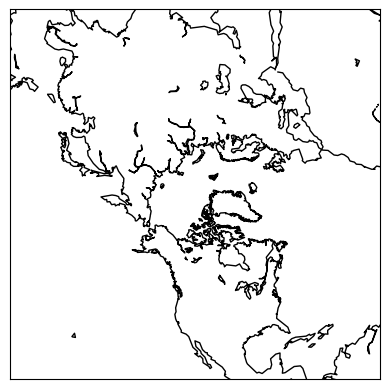

In [60]:
### Set up analysis map with a 22x28 rectangular grid of points ###
MAPSCALE = 1 / 15000000
PLANE_LAT = np.deg2rad(60)

analysis_a.set_mapscale(MAPSCALE)
analysis_a.set_planelat(PLANE_LAT)
map_size = analysis_a.cal_mapsize(20)

print(map_size)

map = Basemap(projection = "npstere", lat_ts = 60, lon_0 = -115, boundinglat = 20)

map.drawcoastlines()

In [61]:
### convert obs lat/long to x,y (may want to plot on your analysis grid to verify)###
analysis_a.convert_pos(-115)

TypeError: list indices must be integers or slices, not tuple

In [7]:
### Perform 500mb geopotential height analyses using a second order 2-d polynomial with two ###
### radii of influence (10cm & 20cm) ###


In [8]:
### Plot 500mb analyses over a map ###
#convert analysis x,y to lat/lon#


proj = ccrs.Stereographic(central_longitude=-115,central_latitude=90,true_scale_latitude=60)
fig = plt.figure(figsize=(8,8),dpi=200)
ax1 = fig.add_subplot(111,projection=proj)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.COASTLINE)

#plot analysis (MAY NEED TO CHANGE VARIABLE NAMES/INDICES)#
cs1 = ax1.contour(LON,LAT,ANALYSIS[:,:,0],colors='k',levels=np.arange(0,8000,60),transform=ccrs.PlateCarree())
plt.clabel(cs1,levels=np.arange(0,8000,60))
plt.show()


NameError: name 'LON' is not defined

/Users/bradyadams/work/snd_env/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


Error in callback <function _draw_all_if_interactive at 0x14a645120> (for post_execute), with arguments args (),kwargs {}:


URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1002)>

/Users/bradyadams/work/snd_env/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1002)>

<Figure size 1600x1600 with 1 Axes>

In [ ]:
### Plot number of observations available to polynomial fitting scheme for each grid point ###
proj = ccrs.Stereographic(central_longitude=-115,central_latitude=90,true_scale_latitude=60)
fig = plt.figure(figsize=(8,8),dpi=200)
ax1 = fig.add_subplot(111,projection=proj)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.COASTLINE)

#plot number of observations (MAY NEED TO CHANGE VARIABLE NAMES/INDICES)#
cs1 = ax1.contour(LON,LAT,N_OBS[:,:,0],colors='k',levels=np.arange(0,200,5),transform=ccrs.PlateCarree())
plt.clabel(cs1,levels=np.arange(0,200,10))

plt.show()

In [ ]:
### Store the analyses in text files ###



In [ ]:
### Store the number of observations available for each grid point in text files ###



In [ ]:
### In a separte text file (or below), answer the following questions ###
'''
1 - Describe the general features that you see in your contoured analyses.
    

2 - Describe the differences that you see in your contoured analyses.  
    Does one analysis seem to be smoother than the other?  If so, what would cause this?
    

3 - Run your program using a radius of influence of 6 cm (do not need to show).  
    Describe the results - do they look realistic?  If there are problems, what
    do you think might be causing them?
    

4 - Suppose you ran this program with a small enough radius of influence that only one
    observation was available for determining a polynomial fit at a grid point.  Should
    you be able to perform the matrix inversion?  Why or why not?
    

'''